<a href="https://colab.research.google.com/github/13194307/UTS_ML2019_ID13194307/blob/master/modelExperiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Imports
from google.colab import files
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import keras
from keras import models
from keras import layers
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from matplotlib import pyplot as plt

In [0]:
# Imports dataset from github repo

urlDataset = r"https://raw.githubusercontent.com/13194307/UTS_ML2019_ID13194307/master/ML_A2_PracticalProject/modifiedDataset.csv"
urlTest = r"https://raw.githubusercontent.com/13194307/UTS_ML2019_ID13194307/master/ML_A2_PracticalProject/test.csv"
dataset = pd.read_csv(urlDataset)

In [3]:
dataset.head()

,Unnamed: 0,AnimalID,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,AgeInDays,Gender,IsDesexed,DayOfWeek,Month,Year,IsWeekend,Hour,TimeOfDay
0,0,A671945,Hambone,12-02-14 18:22,Return,Dog,Neutered Male,1 year,Shetland Sheepdog,Brown,365,Male,Yes,Wednesday,Feb,14,False,18,Evening
1,1,A656520,Emily,13-10-13 12:44,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair,Cream Tabby,365,Female,Yes,Sunday,Oct,13,True,13,Afternoon
2,2,A686464,Pearce,31-01-15 12:28,Adoption,Dog,Neutered Male,2 years,Pit Bull,Blue,730,Male,Yes,Saturday,Jan,15,True,12,Morning
3,3,A683430,Unknown,11-07-14 19:09,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair,Blue Cream,21,Male,No,Friday,Jul,14,False,19,Evening
4,4,A667013,Unknown,15-11-13 12:52,Transfer,Dog,Neutered Male,2 years,Lhasa Apso,Tan,730,Male,Yes,Friday,Nov,13,False,13,Afternoon


In [4]:
x = dataset.drop(["Unnamed: 0", "AnimalID", "Name", "DateTime",
                  "OutcomeType", "Breed", "SexuponOutcome", "AgeuponOutcome", "Year"], axis=1)
x = pd.get_dummies(x)
y = dataset["OutcomeType"]

lb = preprocessing.LabelBinarizer()

scaler = preprocessing.StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x))

x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
0,-0.395879,-0.692592,0.907842,-0.844954,0.844954,-0.00865,-0.031204,-0.562357,-0.060972,-0.048218,-0.047827,-0.00865,-0.216713,-0.026671,-0.078813,-0.034075,-0.013678,-0.161325,-0.040606,-0.017303,3.563728,-0.163871,-0.051971,-0.3277,-0.012234,-0.100449,-0.145214,-0.031799,-0.130562,-0.028041,-0.091308,-0.102332,-0.088774,-0.056482,-0.05375,-0.092549,-0.043723,-0.038226,-0.023696,-0.012234,...,-0.044574,-0.00865,-0.039195,-0.258482,-0.122944,-0.148931,-0.035688,-0.175652,-0.37815,-0.093164,-0.034075,-0.925440,1.004537,-0.206582,-0.597733,-0.206582,0.661151,-0.393636,-0.400581,-0.440763,-0.438885,-0.380216,-0.413074,2.571984,-0.259715,-0.297401,-0.334586,3.642896,-0.309314,-0.321645,-0.308224,-0.243662,-0.291549,-0.332994,-0.347573,-0.284696,-0.800829,1.251163,-0.504626,-0.129521
1,-0.395879,1.443852,-0.557213,1.183497,-1.183497,-0.00865,-0.031204,-0.562357,-0.060972,-0.048218,-0.047827,-0.00865,-0.216713,-0.026671,-0.078813,-0.034075,-0.013678,-0.161325,-0.040606,-0.017303,-0.280605,-0.163871,-0.051971,-0.3277,-0.012234,-0.100449,-0.145214,-0.031799,-0.130562,-0.028041,-0.091308,9.772133,-0.088774,-0.056482,-0.05375,-0.092549,-0.043723,-0.038226,-0.023696,-0.012234,...,-0.044574,-0.00865,-0.039195,-0.258482,-0.122944,-0.148931,-0.035688,-0.175652,-0.37815,-0.093164,-0.034075,1.080568,-0.995483,-0.206582,-0.597733,-0.206582,0.661151,-0.393636,-0.400581,-0.440763,2.278501,-0.380216,-0.413074,-0.388805,-0.259715,-0.297401,-0.334586,-0.274507,-0.309314,-0.321645,-0.308224,-0.243662,-0.291549,-0.332994,2.877096,-0.284696,1.248707,-0.799256,-0.504626,-0.129521
2,-0.058741,1.443852,-0.850224,-0.844954,0.844954,-0.00865,-0.031204,-0.562357,-0.060972,-0.048218,-0.047827,-0.00865,4.614406,-0.026671,-0.078813,-0.034075,-0.013678,-0.161325,-0.040606,-0.017303,-0.280605,-0.163871,-0.051971,-0.3277,-0.012234,-0.100449,-0.145214,-0.031799,-0.130562,-0.028041,-0.091308,-0.102332,-0.088774,-0.056482,-0.05375,-0.092549,-0.043723,-0.038226,-0.023696,-0.012234,...,-0.044574,-0.00865,-0.039195,-0.258482,-0.122944,-0.148931,-0.035688,-0.175652,-0.37815,-0.093164,-0.034075,-0.925440,1.004537,-0.206582,-0.597733,-0.206582,0.661151,-0.393636,-0.400581,2.268794,-0.438885,-0.380216,-0.413074,-0.388805,-0.259715,-0.297401,-0.334586,-0.274507,3.232957,-0.321645,-0.308224,-0.243662,-0.291549,-0.332994,-0.347573,-0.284696,-0.800829,-0.799256,1.981667,-0.129521
3,-0.713620,-0.692592,1.200853,1.183497,-1.183497,-0.00865,-0.031204,-0.562357,-0.060972,-0.048218,-0.047827,-0.00865,-0.216713,37.493859,-0.078813,-0.034075,-0.013678,-0.161325,-0.040606,-0.017303,-0.280605,-0.163871,-0.051971,-0.3277,-0.012234,-0.100449,-0.145214,-0.031799,-0.130562,-0.028041,-0.091308,-0.102332,-0.088774,-0.056482,-0.05375,-0.092549,-0.043723,-0.038226,-0.023696,-0.012234,...,-0.044574,-0.00865,-0.039195,-0.258482,-0.122944,-0.148931,-0.035688,-0.175652,-0.37815,-0.093164,-0.034075,-0.925440,1.004537,-0.206582,1.672989,-0.206582,-1.512514,2.540415,-0.400581,-0.440763,-0.438885,-0.380216,-0.413074,-0.388805,-0.259715,-0.297401,-0.334586,-0.274507,-0.309314,3.109019,-0.308224,-0.243662,-0.291549,-0.332994,-0.347573,-0.284696,-0.800829,1.251163,-0.504626,-0.129521
4,-0.058741,-0.692592,-0.557213,-0.844954,0.844954,-0.00865,-0.031204,-0.562357,-0.060972,-0.048218,-0.047827,-0.00865,-0.216713,-0.026671,-0.078813,-0.034075,-0.013678,-0.161325,-0.040606,-0.017303,-0.280605,-0.163871,-0.051971,-0.3277,-0.012234,-0.100449,-0.145214,-0.031799,-0.130562,-0.028041,-0.091308,-0.102332,-0.088774,-0.056482,-0.05375,-0.092549,-0.043723,-0.038226,-0.023696,-0.012234,...,-0.044574,-0.00865,-0.039195,3.868739,-0.122944,-0.148931,-0.035688,-0.175652,-0.37815,-0.093164,-0.034075,-0.925440,1.004537,-0.206582,-0.597733,-0.206582,0.661151,2.540415,-0.400581,-0.440763,-0.438

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)
y_train_unaltered = y_train
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
y_val = lb.fit_transform(y_val)

In [0]:
model = models.Sequential()
model.add(layers.Dense(20, input_shape=(x_train.shape[1],), activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 20)                1840      
_________________________________________________________________
dropout_9 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_10 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_11 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 20)               

In [0]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['acc'])

In [0]:
history = model.fit(x_train, y_train, epochs=30, batch_size=16, validation_data=(x_val, y_val))

Train on 17106 samples, validate on 4277 samples
Epoch 1/30
17106/17106 [==============================] - 2s 138us/step - loss: 1.0987 - acc: 0.5616 - val_loss: 0.9590 - val_acc: 0.6102
Epoch 2/30
17106/17106 [==============================] - 2s 100us/step - loss: 0.9726 - acc: 0.6238 - val_loss: 0.9220 - val_acc: 0.6346
Epoch 3/30
17106/17106 [==============================] - 2s 100us/step - loss: 0.9463 - acc: 0.6322 - val_loss: 0.9127 - val_acc: 0.6369
Epoch 4/30
17106/17106 [==============================] - 2s 101us/step - loss: 0.9282 - acc: 0.6371 - val_loss: 0.9079 - val_acc: 0.6346
Epoch 5/30
17106/17106 [==============================] - 2s 102us/step - loss: 0.9157 - acc: 0.6408 - val_loss: 0.8978 - val_acc: 0.6348
Epoch 6/30
17106/17106 [==============================] - 2s 100us/step - loss: 0.9050 - acc: 0.6440 - val_loss: 0.9047 - val_acc: 0.6362
Epoch 7/30
17106/17106 [==============================] - 2s 102us/step - loss: 0.8995 - acc: 0.6447 - val_loss: 0.8954 - v

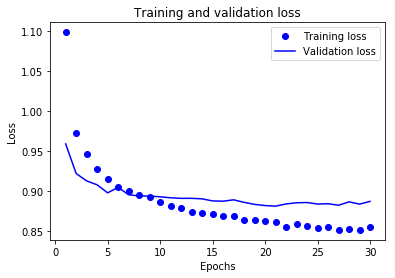

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
def numericLabels(x):
    outputArr = np.zeros((len(x), 5))
    
    for i in range(len(x)):
        outputArr[i, x[i]] = 1
                
    return outputArr
    

In [0]:
y_test.shape

(5346, 5)

In [0]:
pred = model.predict_classes(x_test)
prob = model.predict(x_test)
pred = numericLabels(pred)
print(accuracy_score(pred, y_test))
print(log_loss(y_test, prob))

In [0]:
gb = GradientBoostingClassifier(n_estimators=30, learning_rate=0.5)
gb.fit(x_train, y_train_unaltered)
gbprob = gb.predict_proba(x_test)
log_loss(y_test, gbprob)

In [0]:
knn = KNeighborsClassifier(n_neighbors = 133)
knn.fit(x_train, y_train_unaltered)
knnprob = knn.predict_proba(x_test)
log_loss(y_test, knnprob)

In [0]:
rf = RandomForestClassifier(n_estimators=900)
rf.fit(x_train, y_train_unaltered)
rfprob = rf.predict_proba(x_test)
log_loss(y_test, rfprob)

In [0]:
svm = SVC(kernel='rbf', probability=True)
svm.fit(x_train, y_train_unaltered)
svmprob = svm.predict_proba(x_test)
log_loss(y_test, svmprob)